**ANALISIS EXPLORATORIO (EDA)**

**CryptoCurrency List:**

1.) Bitcoin (BTC).

2.) VeChain (VET).

3.) Cardano (ADA).

4.) Polkadot (DOT).

5.) The Sandbox (SAND).

6.) ApeCoin (APE).

7.) Chiliz (CHZ).

8.) Dash (DASH).

9.) Ethereum (ETH).

10.) Tether (USDT).

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI

In [2]:
cg = CoinGeckoAPI()

In [3]:
cg.get_price(ids = ["bitcoin", "vechain", 
"cardano", 
"polkadot", 
"the-sandbox", 
"apecoin", 
"chiliz", 
"dash", 
"ethereum", 
"tether" ], 
vs_currencies = "usd")

{'apecoin': {'usd': 1.83},
 'bitcoin': {'usd': 29215},
 'cardano': {'usd': 0.281471},
 'chiliz': {'usd': 0.070699},
 'dash': {'usd': 29.83},
 'ethereum': {'usd': 1829.58},
 'polkadot': {'usd': 4.83},
 'tether': {'usd': 0.998929},
 'the-sandbox': {'usd': 0.370612},
 'vechain': {'usd': 0.01751176}}

In [4]:
# Lista de criptomonedas
coin_list = [
    "bitcoin",
    "vechain",
    "cardano",
    "polkadot",
    "the-sandbox",
    "apecoin",
    "chiliz",
    "dash",
    "ethereum",
    "tether"
]

In [5]:
#con la lista de monedas seleccionadas, creamos una funcion que nos retorne las monedas con mayor capitalizacion del mercado
def get_top_10_market_cap_coins(coin_list):
    coin_data = cg.get_coins_markets(ids = coin_list, vs_currency = "usd", order = "market_cap_desc")
    top_10_coins = {}
    for coin in coin_data[:10]:
        coin_id = coin["id"]
        coin_name = coin["name"]
        coin_symbol = coin["symbol"]
        coin_market_cap = coin["market_cap"]
        top_10_coins[coin_symbol] = {"Name": coin_name, "Market cap": coin_market_cap, "ID": coin_id}

    return top_10_coins

In [6]:
#obtenemos las monedas de mayor capitalizacion:
top_10_coins = get_top_10_market_cap_coins(coin_list)
for symbol, data in top_10_coins.items():
    print(f"{data['Name']} ({symbol}): Market Cap - {data['Market cap']}")

Bitcoin (btc): Market Cap - 568649730520
Ethereum (eth): Market Cap - 219797555401
Tether (usdt): Market Cap - 83092920703
Cardano (ada): Market Cap - 9863301368
Polkadot (dot): Market Cap - 6110523735
VeChain (vet): Market Cap - 1272936237
The Sandbox (sand): Market Cap - 762473709
ApeCoin (ape): Market Cap - 674099383
Chiliz (chz): Market Cap - 492949864
Dash (dash): Market Cap - 340386167


In [7]:
#df = pd.DataFrame(cg.get_coin_market_chart_by_id(id='chiliz',vs_currency='usd',days='max'))

In [8]:
#df

In [9]:
#Ahora obtenemos los datos historicos de cada una de las cryptos.
def get_historical_data(coin_id):
    historical_data = cg.get_coin_market_chart_by_id(id = coin_id ,vs_currency ='usd',days ='max')
    prices = historical_data["prices"]
    market_caps = historical_data["market_caps"]
    total_volumes = historical_data["total_volumes"]

    data = []
    for i in range(len(prices)):
        timestamps = pd.to_datetime(prices[i][0], unit = "ms")
        price = prices[i][1]
        market_cap = market_caps[i][1]
        volumen = total_volumes[i][1]
        data.append({'Timestamp': timestamps, 'Price': price, 'Market Cap': market_cap, 'Volume': volumen})

    df = pd.DataFrame(data)
    return df 

In [10]:
#Obtenemos los datos historicos de las CryptoMonedas, ejem: btc
top_10_coins = get_top_10_market_cap_coins(coin_list)
cryptos_id = top_10_coins["eth"]["ID"]
cryptos_historical_data = get_historical_data(cryptos_id)

In [11]:
print(cryptos_historical_data.head())

   Timestamp     Price    Market Cap        Volume
0 2015-08-07  2.831620  0.000000e+00  9.062200e+04
1 2015-08-08  1.330750  8.033948e+07  3.680700e+05
2 2015-08-10  0.687586  4.155631e+07  4.004641e+05
3 2015-08-11  1.067379  6.453901e+07  1.518998e+06
4 2015-08-12  1.256613  7.601326e+07  2.073893e+06


In [12]:
#Generamos un Timestamp de la lista de las 10 cryptomonedas escogidas:
def get_timestamps(coin_id):
    historical_data = cg.get_coin_market_chart_by_id(id = coin_id ,vs_currency ='usd',days ='max')
    timestamps = [entry[0] for entry in historical_data["prices"]]
    return timestamps

In [13]:
#Obtener Timestamp de cada cryptomoneda:
top_10_coins = get_top_10_market_cap_coins(coin_list)
timestamps = {}

for symbol, coin_data in top_10_coins.items():
    coin_id = coin_data["ID"]
    timestamps[symbol] = get_timestamps(coin_id)

In [14]:
#Mostramos los Timestamps:
for symbol, timestamps_list in timestamps.items():
    print(f"Timestamps for {symbol}: {timestamps_list}")

Timestamps for btc: [1367107200000, 1367193600000, 1367280000000, 1367366400000, 1367452800000, 1367539200000, 1367625600000, 1367712000000, 1367798400000, 1367884800000, 1367971200000, 1368057600000, 1368144000000, 1368230400000, 1368316800000, 1368403200000, 1368489600000, 1368576000000, 1368662400000, 1368748800000, 1368835200000, 1368921600000, 1369008000000, 1369094400000, 1369180800000, 1369267200000, 1369353600000, 1369440000000, 1369526400000, 1369612800000, 1369699200000, 1369785600000, 1369872000000, 1369958400000, 1370044800000, 1370131200000, 1370217600000, 1370390400000, 1370476800000, 1370563200000, 1370649600000, 1370736000000, 1370822400000, 1370908800000, 1370995200000, 1371081600000, 1371168000000, 1371254400000, 1371340800000, 1371427200000, 1371513600000, 1371600000000, 1371686400000, 1371772800000, 1371859200000, 1371945600000, 1372032000000, 1372118400000, 1372204800000, 1372291200000, 1372377600000, 1372464000000, 1372550400000, 1372636800000, 1372723200000, 1372

In [15]:
for symbol in timestamps:
    del top_10_coins[symbol]["ID"]

#Me lanza los datos historicos de las 10 monedas sin los timestamps:
for symbol, data in top_10_coins.items():
    print(f"{data['Name']} ({symbol}): {data}")

Bitcoin (btc): {'Name': 'Bitcoin', 'Market cap': 568649730520}
Ethereum (eth): {'Name': 'Ethereum', 'Market cap': 219797555401}
Tether (usdt): {'Name': 'Tether', 'Market cap': 83092920703}
Cardano (ada): {'Name': 'Cardano', 'Market cap': 9863301368}
Polkadot (dot): {'Name': 'Polkadot', 'Market cap': 6110523735}
VeChain (vet): {'Name': 'VeChain', 'Market cap': 1272936237}
The Sandbox (sand): {'Name': 'The Sandbox', 'Market cap': 762473709}
ApeCoin (ape): {'Name': 'ApeCoin', 'Market cap': 674099383}
Chiliz (chz): {'Name': 'Chiliz', 'Market cap': 492949864}
Dash (dash): {'Name': 'Dash', 'Market cap': 340386167}


In [16]:
#Procedemos a crear el DataFrame limpio:
def get_historical_data(coin_id):
    historical_data = cg.get_coin_market_chart_by_id(id = coin_id, vs_currency ='usd', days ='max')
    prices = [entry[1] for entry in historical_data['prices']]
    timestamps = [pd.to_datetime(entry[0], unit ='ms') for entry in historical_data['prices']]
    market_caps = [entry[1] for entry in historical_data['market_caps']]
    volumes = [entry[1] for entry in historical_data['total_volumes']]
    df = pd.DataFrame({'Timestamp': timestamps, 'Price': prices, 'Market Cap': market_caps, 'Volume': volumes})
    return df


In [17]:
# Crear un DataFrame con los datos históricos de todas las criptomonedas
top_10_coins = get_top_10_market_cap_coins(coin_list)
dataframes = [get_historical_data(coin_data['ID']).assign(Coin = symbol) for symbol, coin_data in top_10_coins.items()]

# Concatenar los DataFrames en uno solo
final_df = pd.concat(dataframes)

# Aplicar formato de moneda a las columnas "Price", "Market Cap" y "Volume"
#currency_columns = ['Price', 'Market Cap', 'Volume']
#for col in currency_columns:
   # final_df[col] = final_df[col].apply(lambda x: "${:,.2f}".format(round(x, 2)))

# Mostrar los datos de cada criptomoneda en un DataFrame individual
for symbol in top_10_coins.keys():
    coin_df = final_df[final_df['Coin'] == symbol]
    display(coin_df)

    # Guardar el DataFrame en un archivo CSV
    final_df.to_csv('datos_criptomonedas.csv', index = False)

,Timestamp,Price,Market Cap,Volume,Coin
0,2013-04-28 00:00:00,135.300000,1.500518e+09,0.000000e+00,btc
1,2013-04-29 00:00:00,141.960000,1.575032e+09,0.000000e+00,btc
2,2013-04-30 00:00:00,135.300000,1.501657e+09,0.000000e+00,btc
3,2013-05-01 00:00:00,117.000000,1.298952e+09,0.000000e+00,btc
4,2013-05-02 00:00:00,103.430000,1.148668e+09,0.000000e+00,btc
...,...,...,...,...,...
3756,2023-08-12 00:00:00,29396.847971,5.719766e+11,4.651950e+09,btc
3757,2023-08-13 00:00:00,29412.142275,5.722578e+11,3.994298e+09,btc
3758,2023-08-14 00:00:00,29284.969714,5.696871e+11,4.755220e+09,btc
3759,2023-08-15 00:00:00,29400.586804,5.722427e+11,1.240836e+10,btc


,Timestamp,Price,Market Cap,Volume,Coin
0,2015-08-07 00:00:00,2.831620,0.000000e+00,9.062200e+04,eth
1,2015-08-08 00:00:00,1.330750,8.033948e+07,3.680700e+05,eth
2,2015-08-10 00:00:00,0.687586,4.155631e+07,4.004641e+05,eth
3,2015-08-11 00:00:00,1.067379,6.453901e+07,1.518998e+06,eth
4,2015-08-12 00:00:00,1.256613,7.601326e+07,2.073893e+06,eth
...,...,...,...,...,...
2927,2023-08-13 00:00:00,1848.505239,2.220698e+11,2.215987e+09,eth
2928,2023-08-14 00:00:00,1839.512810,2.209483e+11,3.642425e+09,eth
2929,2023-08-15 00:00:00,1843.513391,2.215642e+11,4.495325e+09,eth
2930,2023-08-16 00:00:00,1826.913128,2.194728e+11,4.416612e+09,eth


,Timestamp,Price,Market Cap,Volume,Coin
0,2015-02-25 00:00:00,1.210160,3.044760e+05,5.000000e+00,usdt
1,2015-03-02 00:00:00,0.572521,1.440460e+05,2.000000e+00,usdt
2,2015-03-06 00:00:00,1.000000,2.516000e+05,5.000000e+01,usdt
3,2015-03-07 00:00:00,1.000000,2.516000e+05,5.819600e+04,usdt
4,2015-03-08 00:00:00,1.000000,2.516000e+05,3.100000e+01,usdt
...,...,...,...,...,...
3068,2023-08-13 00:00:00,0.999377,8.335542e+10,9.189020e+09,usdt
3069,2023-08-14 00:00:00,0.999384,8.330329e+10,9.254138e+09,usdt
3070,2023-08-15 00:00:00,0.998713,8.332348e+10,1.279237e+10,usdt
3071,2023-08-16 00:00:00,0.998893,8.308914e+10,1.874669e+10,usdt


,Timestamp,Price,Market Cap,Volume,Coin
0,2017-10-18 00:00:00,0.026845,6.960214e+08,2.351678e+06,ada
1,2017-10-19 00:00:00,0.026830,6.956220e+08,2.815156e+06,ada
2,2017-10-20 00:00:00,0.030300,7.855800e+08,8.883473e+06,ada
3,2017-10-21 00:00:00,0.028588,7.412021e+08,5.308857e+06,ada
4,2017-10-22 00:00:00,0.027796,7.206698e+08,2.901876e+06,ada
...,...,...,...,...,...
2124,2023-08-12 00:00:00,0.293325,1.027866e+10,1.246106e+08,ada
2125,2023-08-13 00:00:00,0.291666,1.021759e+10,1.056080e+08,ada
2126,2023-08-14 00:00:00,0.289372,1.013505e+10,1.251063e+08,ada
2127,2023-08-15 00:00:00,0.290452,1.018196e+10,1.298745e+08,ada


,Timestamp,Price,Market Cap,Volume,Coin
0,2020-08-19 00:00:00,2.936665,0.000000e+00,8.241398e+07,dot
1,2020-08-20 00:00:00,2.936665,0.000000e+00,8.241398e+07,dot
2,2020-08-21 00:00:00,2.898791,0.000000e+00,4.951174e+07,dot
3,2020-08-22 00:00:00,2.871923,0.000000e+00,5.123375e+07,dot
4,2020-08-23 00:00:00,4.481389,4.028277e+09,4.739210e+08,dot
...,...,...,...,...,...
1089,2023-08-13 00:00:00,5.032357,6.359270e+09,6.147914e+07,dot
1090,2023-08-14 00:00:00,4.984807,6.297005e+09,7.586433e+07,dot
1091,2023-08-15 00:00:00,4.986299,6.307074e+09,9.157987e+07,dot
1092,2023-08-16 00:00:00,4.810660,6.087074e+09,1.060911e+08,dot


,Timestamp,Price,Market Cap,Volume,Coin
0,2018-07-27 00:00:00,0.024916,1.317939e+09,9.689896e+07,vet
1,2018-07-28 00:00:00,0.024978,1.321200e+09,4.303242e+07,vet
2,2018-07-29 00:00:00,0.025667,1.357667e+09,1.792036e+07,vet
3,2018-07-30 00:00:00,0.026372,1.394918e+09,2.354678e+07,vet
4,2018-07-31 00:00:00,0.025333,1.339962e+09,2.743729e+07,vet
...,...,...,...,...,...
1843,2023-08-13 00:00:00,0.017892,1.301203e+09,2.175250e+07,vet
1844,2023-08-14 00:00:00,0.018080,1.315631e+09,3.007781e+07,vet
1845,2023-08-15 00:00:00,0.018570,1.350964e+09,3.554694e+07,vet
1846,2023-08-16 00:00:00,0.017616,1.280795e+09,3.519355e+07,vet


,Timestamp,Price,Market Cap,Volume,Coin
0,2020-08-14 00:00:00,0.080920,0.000000e+00,3.841302e+07,sand
1,2020-08-15 00:00:00,0.066403,0.000000e+00,1.410560e+08,sand
2,2020-08-16 00:00:00,0.050784,0.000000e+00,4.315041e+07,sand
3,2020-08-17 00:00:00,0.061080,3.276463e+07,3.370087e+07,sand
4,2020-08-18 00:00:00,0.054974,7.171054e+07,1.621430e+07,sand
...,...,...,...,...,...
1093,2023-08-12 00:00:00,0.400066,8.234110e+08,7.967863e+07,sand
1094,2023-08-13 00:00:00,0.401740,8.264524e+08,5.993890e+07,sand
1095,2023-08-14 00:00:00,0.392973,8.080138e+08,7.751237e+07,sand
1096,2023-08-15 00:00:00,0.392645,8.079203e+08,1.059239e+08,sand


,Timestamp,Price,Market Cap,Volume,Coin
0,2022-03-17 00:00:00,8.536839,9.460814e+08,1.455627e+09,ape
1,2022-03-18 00:00:00,8.536839,9.460814e+08,1.455627e+09,ape
2,2022-03-19 00:00:00,12.988729,1.740630e+09,5.214126e+09,ape
3,2022-03-20 00:00:00,11.535165,1.542255e+09,1.816680e+09,ape
4,2022-03-21 00:00:00,9.618214,1.261483e+09,1.381888e+09,ape
...,...,...,...,...,...
513,2023-08-12 00:00:00,1.902944,7.011184e+08,6.167563e+07,ape
514,2023-08-13 00:00:00,2.013694,7.408042e+08,1.554497e+08,ape
515,2023-08-14 00:00:00,2.003050,7.355123e+08,1.078410e+08,ape
516,2023-08-15 00:00:00,2.057749,7.597912e+08,1.286096e+08,ape


,Timestamp,Price,Market Cap,Volume,Coin
0,2019-07-02 00:00:00,0.017123,5.156286e+07,1.370848e+06,chz
1,2019-07-03 00:00:00,0.016304,4.909766e+07,4.552720e+05,chz
2,2019-07-04 00:00:00,0.011944,3.596619e+07,1.923948e+05,chz
3,2019-07-05 00:00:00,0.013802,4.156306e+07,2.252789e+05,chz
4,2019-07-06 00:00:00,0.015894,4.786372e+07,2.731453e+05,chz
...,...,...,...,...,...
1502,2023-08-12 00:00:00,0.075445,5.263226e+08,2.037562e+07,chz
1503,2023-08-13 00:00:00,0.076274,5.323097e+08,1.973641e+07,chz
1504,2023-08-14 00:00:00,0.075834,5.288752e+08,2.419251e+07,chz
1505,2023-08-15 00:00:00,0.075461,5.265730e+08,2.655627e+07,chz


,Timestamp,Price,Market Cap,Volume,Coin
0,2014-02-14 00:00:00,0.213899,7.025370e+05,7.485000e+03,dash
1,2014-02-15 00:00:00,0.317768,1.054626e+06,2.146600e+04,dash
2,2014-02-17 00:00:00,0.561400,1.882753e+06,5.820900e+04,dash
3,2014-02-18 00:00:00,1.114720,3.766068e+06,1.858700e+05,dash
4,2014-02-19 00:00:00,0.907017,3.038521e+06,6.958500e+04,dash
...,...,...,...,...,...
3463,2023-08-12 00:00:00,32.475103,3.702993e+08,2.513165e+07,dash
3464,2023-08-13 00:00:00,32.245122,3.678537e+08,2.117626e+07,dash
3465,2023-08-14 00:00:00,32.014267,3.651272e+08,2.402484e+07,dash
3466,2023-08-15 00:00:00,31.946394,3.644826e+08,3.027998e+07,dash


**EDA**

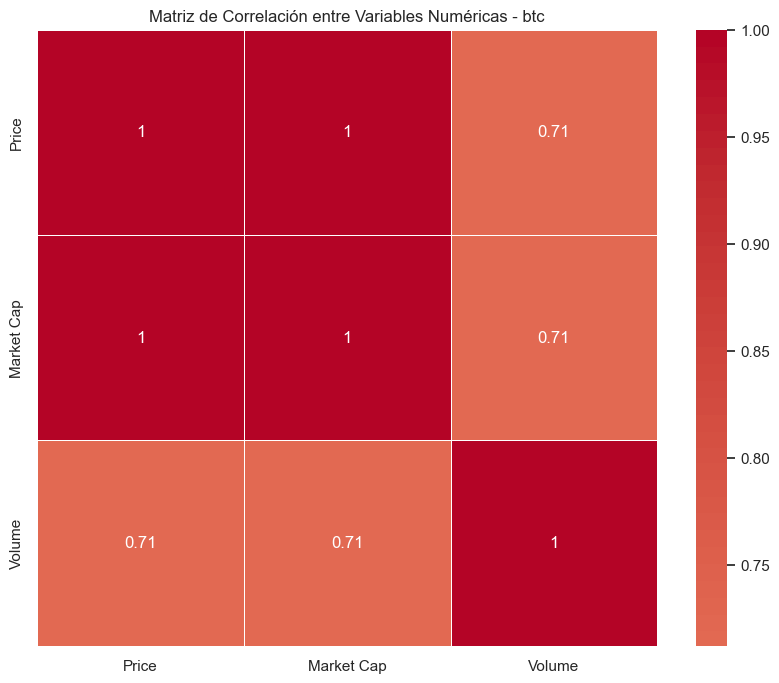

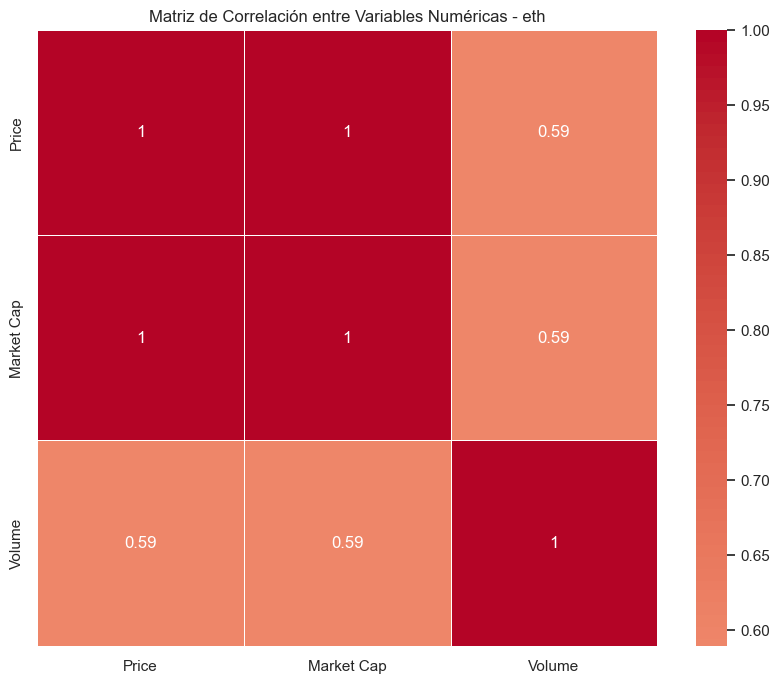

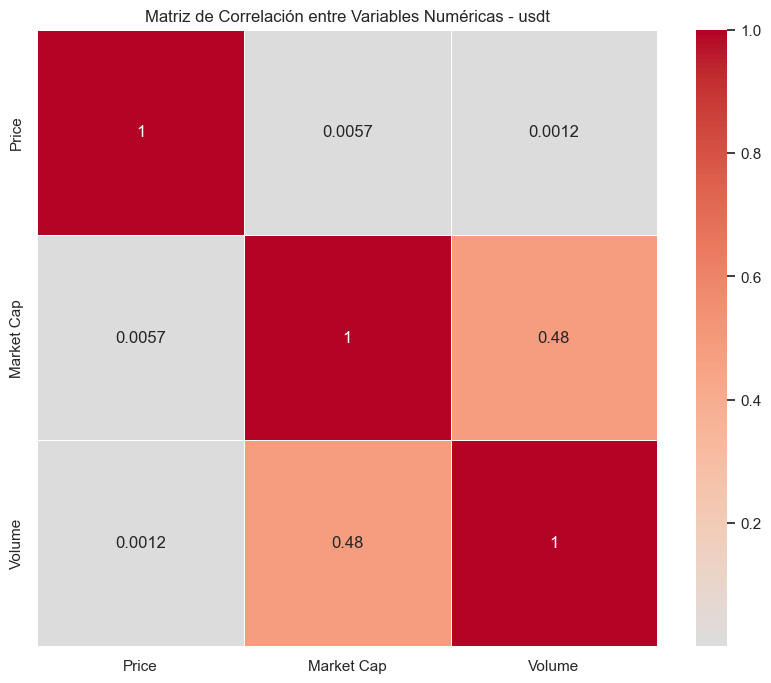

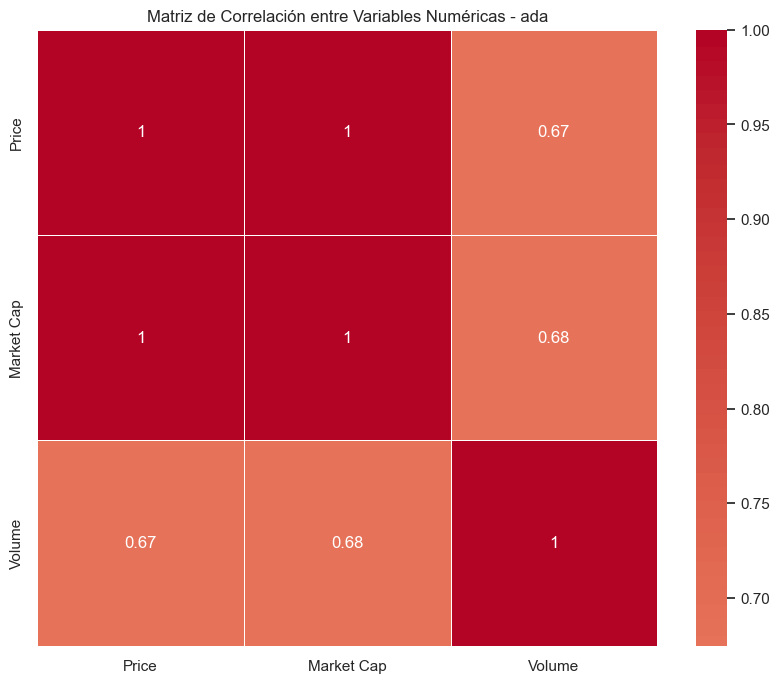

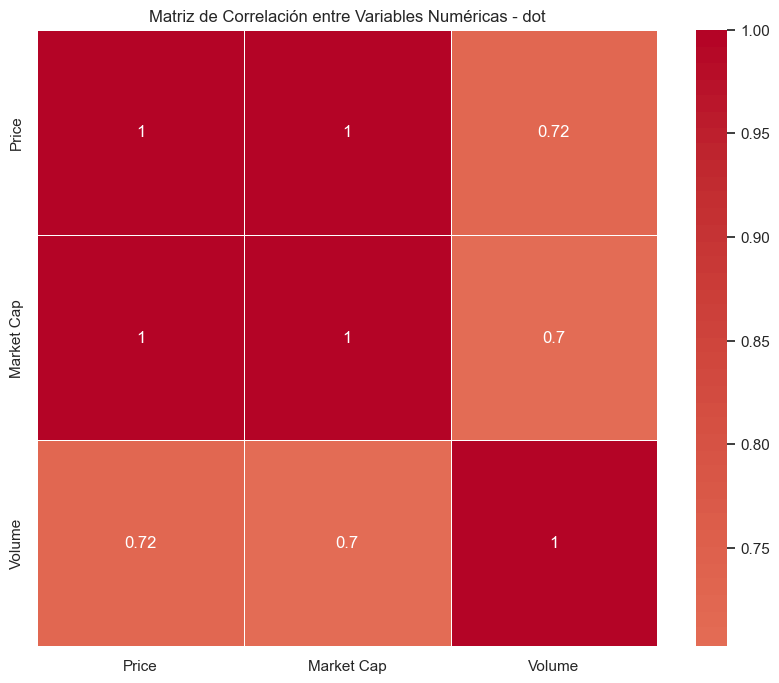

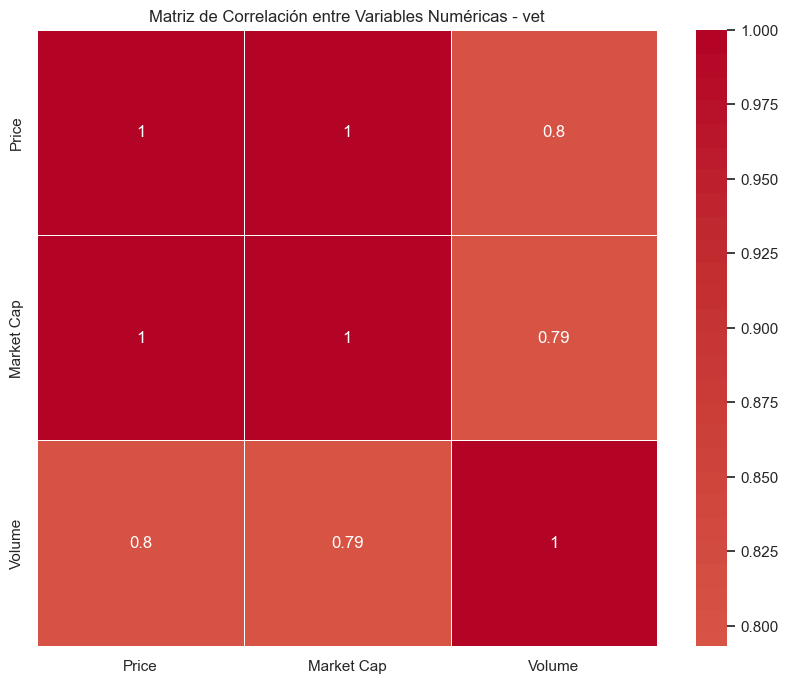

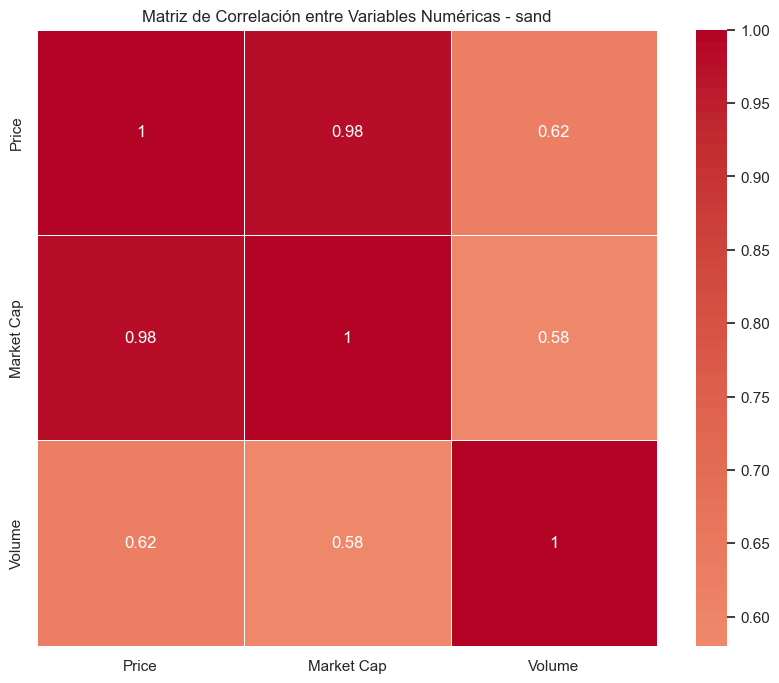

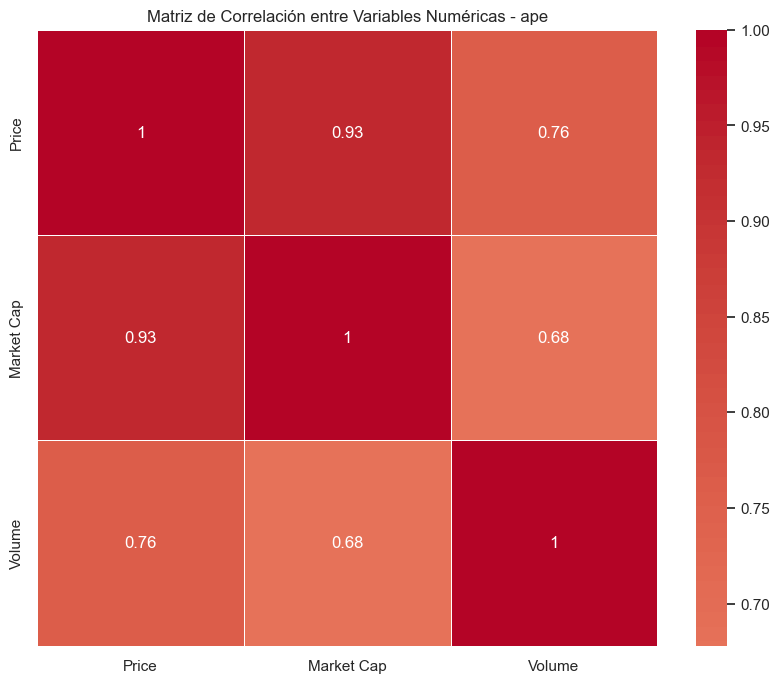

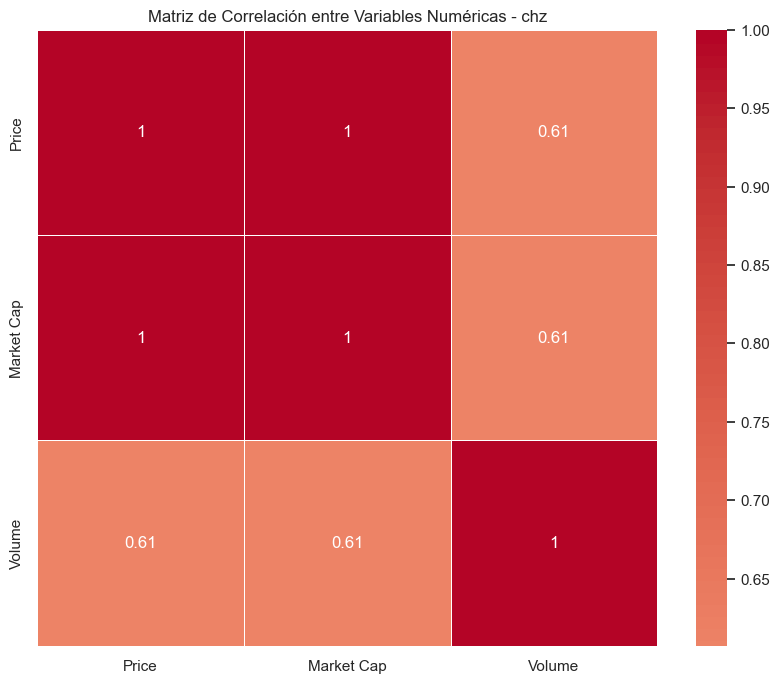

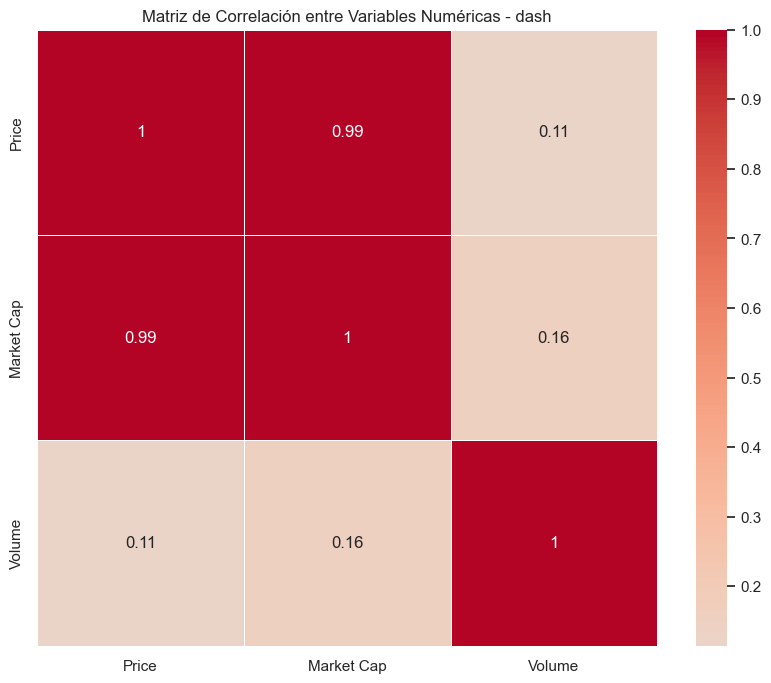

In [18]:
#Procedemos a crear la Matriz de Correlacion:

def plot_correlation_matrix(dataframe, coin):
    #Filtrar los datos solo para la moneda en especifico:
    coin_df = dataframe[dataframe["Coin"] == coin]

    #Seleccionar solo las columnas numéricas para la matriz de correlación
    numeric_columns = coin_df.select_dtypes(include=[float, int]).columns
    correlation_matrix = coin_df[numeric_columns].corr()

    #Establecer el estilo de las visualizaciones de Seaborn
    sns.set(style="white")

    #Crear una matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=.5)
    plt.title(f'Matriz de Correlación entre Variables Numéricas - {coin}')
    plt.show()

#Llamar a la función con tu DataFrame 'final_df' y la moneda deseada
plot_correlation_matrix(final_df, 'btc')
plot_correlation_matrix(final_df, 'eth')
plot_correlation_matrix(final_df, 'usdt')
plot_correlation_matrix(final_df, 'ada')
plot_correlation_matrix(final_df, 'dot')
plot_correlation_matrix(final_df, 'vet')
plot_correlation_matrix(final_df, 'sand')
plot_correlation_matrix(final_df, 'ape')
plot_correlation_matrix(final_df, 'chz')
plot_correlation_matrix(final_df, 'dash')

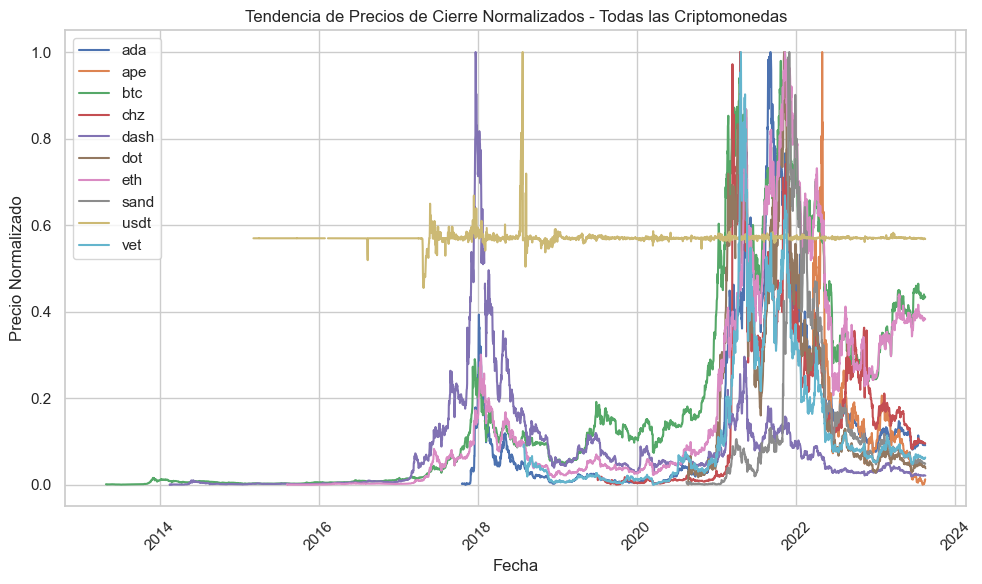

In [20]:
#Grafico de Tendencia:

from sklearn.preprocessing import MinMaxScaler

def plot_combined_normalized_trends(dataframe):
    #Copiar el DataFrame original para no modificar los datos originales
    df = dataframe.copy()

    #Crear una instancia del escalador MinMaxScaler
    scaler = MinMaxScaler()

    #Seleccionar solo las columnas de precio de cierre para normalizar
    prices = df.pivot(index='Timestamp', columns='Coin', values='Price')
    normalized_prices = scaler.fit_transform(prices)

    #Crear un DataFrame con los precios normalizados
    normalized_df = pd.DataFrame(normalized_prices, columns=prices.columns, index=prices.index)

    #Establecer el estilo de las visualizaciones de Seaborn
    sns.set(style="whitegrid")

    #Crear un gráfico de tendencia combinado con todas las criptomonedas con precios normalizados
    plt.figure(figsize=(10, 6)) 
    for symbol in normalized_df.columns:
        plt.plot(normalized_df.index, normalized_df[symbol], label=symbol)

    plt.title('Tendencia de Precios de Cierre Normalizados - Todas las Criptomonedas')
    plt.xlabel('Fecha')
    plt.ylabel('Precio Normalizado')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

#Llamar a la función con tu DataFrame 'final_df'
plot_combined_normalized_trends(final_df)


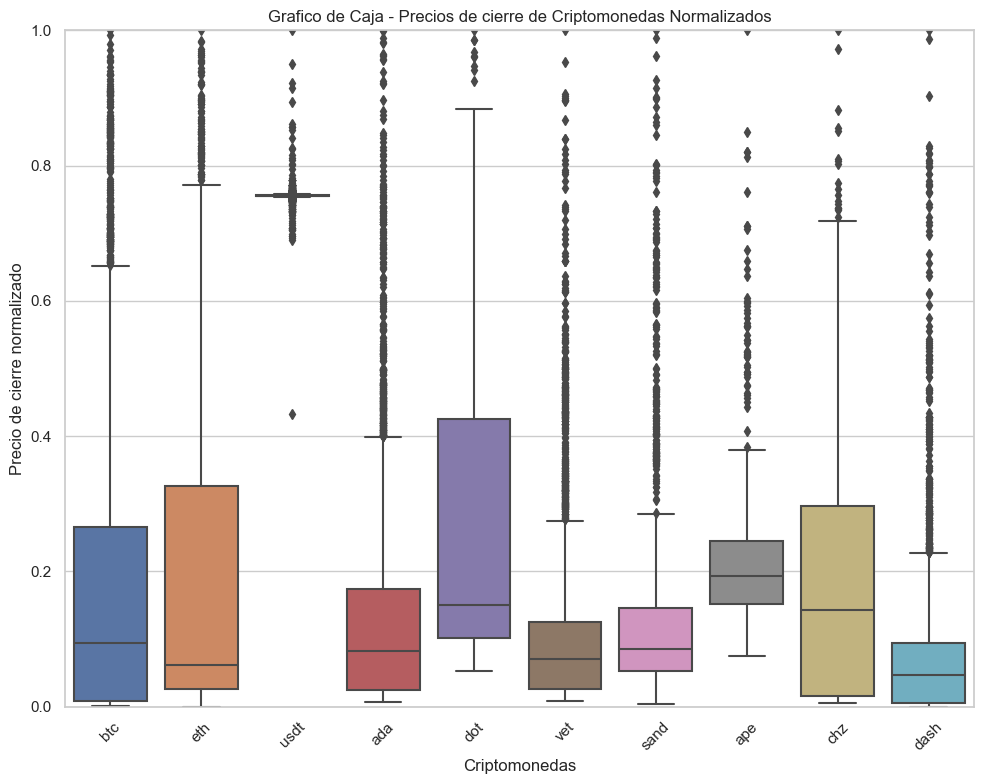

In [ ]:
#Creacion Boxplot:

def plot_individual_normalized_boxplots(dataframe):
    #Copiar el DataFrame original para no modificar los datos originales
    df = dataframe.copy()

    #Normalizar los datos dividiendo por el valor máximo de la columna "Price"
    df['Price'] = df.groupby('Coin')['Price'].transform(lambda x: x / x.max())

    #Establecer el estilo de las visualizaciones de Seaborn
    sns.set(style="whitegrid")

    #Crear un gráfico de caja para precios de cierre de cada criptomoneda normalizados
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df, x="Coin", y="Price")
    plt.title("Grafico de Caja - Precios de cierre de Criptomonedas Normalizados")
    plt.xlabel("Criptomonedas")
    plt.ylabel("Precio de cierre normalizado")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Ajustar el rango de valores en el eje y de 0 a 1
    plt.tight_layout()

    plt.show()

#Llamar a la función con tu DataFrame 'final_df'
plot_individual_normalized_boxplots(final_df)

#en el rango vaya de 0 a 1, agarrar cada variable y dividirla por el maximo de la columna